# Générer les fichiers inputs pour la réseau de neurone

### Import library

In [2]:
import intake
import dask_hpcconfig
from distributed import Client
import xarray as xr
import hvplot.xarray
import geoviews.feature as gf
import os
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns
import numpy as np
import matplotlib
from py_eddy_tracker.poly import create_vertice

# cartopy
from cartopy import config
import cartopy.crs as ccrs

# eddy tracker
from datetime import datetime
from matplotlib import pyplot as plt
from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset

from py_eddy_tracker import data
from py_eddy_tracker.observations.observation import EddiesObservations
from matplotlib import pyplot as plt
from numpy import arange, cos, linspace, radians, sin
from py_eddy_tracker.eddy_feature import Contours
from py_eddy_tracker.generic import local_to_coordinates
from datetime import timedelta, date
import os, glob


# Dask

In [2]:
overrides = {"cluster.cores": 7,"cluster.n_workers":7,"cluster.processes":7}
cluster = dask_hpcconfig.cluster("datarmor", **overrides)
cluster.scale(jobs=4)
client = Client(cluster)

In [ ]:
client

# Paramètres

In [5]:
period='2010_2021'
region='MENOR'

In [12]:
ds = xr.open_dataset("/home1/scratch/ddasilva/FICHIERS_"+region+"_"+period+".nc",chunks={'time':100})

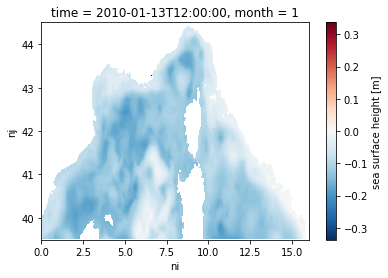

In [8]:
ds.XE.isel(time=100).plot()

In [13]:
XXXX=ds.SLA.sel(time='2018-01-07T00:00:00.000000000') 
XXXX

<xarray.DataArray 'SLA' (nj: 463, ni: 1101)>
dask.array<getitem, shape=(463, 1101), dtype=float32, chunksize=(463, 1101), chunktype=numpy.ndarray>
Coordinates:
    latitude   (nj, ni) float64 dask.array<chunksize=(463, 1101), meta=np.ndarray>
    longitude  (nj, ni) float64 dask.array<chunksize=(463, 1101), meta=np.ndarray>
  * ni         (ni) float64 0.0 0.01455 0.02909 0.04364 ... 15.97 15.99 16.0
  * nj         (nj) float64 39.5 39.51 39.52 39.53 ... 44.47 44.48 44.49 44.5
    time       datetime64[ns] 2018-01-07
    month      int64 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    units:    m

In [63]:
0=ds.XE.sel(time='2018-01-07T00:00:00.000000000') 

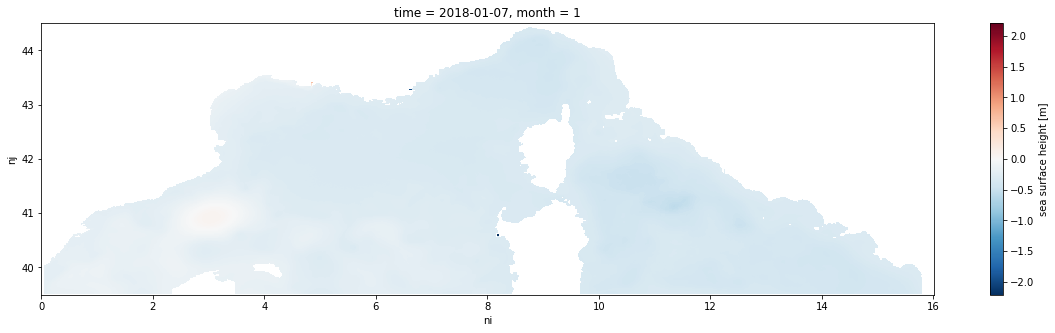

In [64]:
fig = plt.figure(figsize=(20, 5))
ddde.plot()

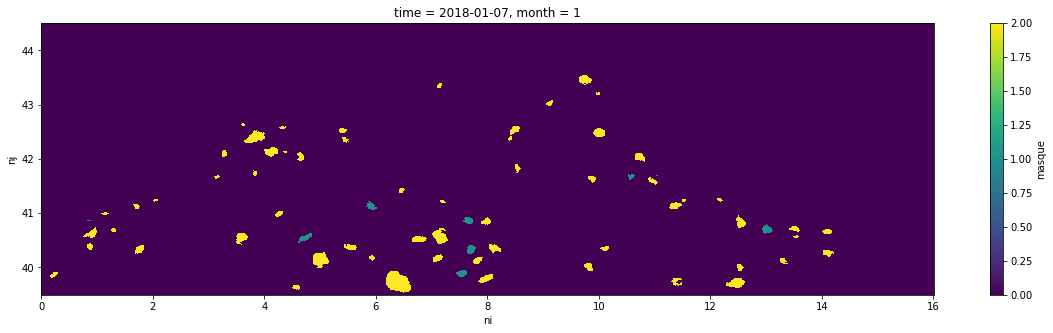

In [65]:
fig = plt.figure(figsize=(20, 5))
XXXX.plot()

# Fichier train (aprox 85%)

In [53]:
XE_train= ds.XE.isel(ni=slice(200,500),nj=slice(100,400)).sel(time=(slice('2010','2019')))
masque_train= ds.masque.isel(ni=slice(200,500),nj=slice(100,400)).sel(time=(slice('2010','2019')))
sla_train= ds.SLA.isel(ni=slice(200,500),nj=slice(100,400)).sel(time=(slice('2010','2019')))

In [51]:
sla_train

<xarray.DataArray 'SLA' (time: 29167, nj: 300, ni: 300)>
dask.array<getitem, shape=(29167, 300, 300), dtype=float32, chunksize=(100, 300, 300), chunktype=numpy.ndarray>
Coordinates:
    latitude   (nj, ni) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    longitude  (nj, ni) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
  * ni         (ni) float64 2.909 2.924 2.938 2.953 ... 7.215 7.229 7.244 7.258
  * nj         (nj) float64 40.58 40.59 40.6 40.61 ... 43.79 43.8 43.81 43.82
  * time       (time) datetime64[ns] 2010-01-01 ... 2019-12-31T21:00:00
    month      (time) int64 dask.array<chunksize=(100,), meta=np.ndarray>
Attributes:
    units:    m

In [ ]:
ds

In [ ]:
masque_train2=ds.masque.where( ds.masque < 0, 0, ds.masque)

In [ ]:
masque_train

<xarray.DataArray 'masque' (time: 29167, nj: 200, ni: 200)>
dask.array<getitem, shape=(29167, 200, 200), dtype=int64, chunksize=(100, 200, 200), chunktype=numpy.ndarray>
Coordinates:
    latitude   (nj, ni) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    longitude  (nj, ni) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
  * ni         (ni) float64 4.364 4.378 4.393 4.407 ... 7.215 7.229 7.244 7.258
  * nj         (nj) float64 39.5 39.51 39.52 39.53 ... 41.62 41.63 41.64 41.65
  * time       (time) datetime64[ns] 2010-01-01 ... 2019-12-31T21:00:00
    month      (time) int64 dask.array<chunksize=(100,), meta=np.ndarray>

In [ ]:
masque_train2=masque_train.where(masque_train < 0, 0, masque_train.all())

In [ ]:
unique, counts = np.unique(masque_train2, return_counts=True)
print(dict(zip(unique, counts)))

{-9223372036854775806: 2960000, 0: 1163720000}


In [54]:
ddde=XE_train.isel(time='2010-01-01T03:00:00.000000000')

IndexError: index 1262314800000000000 is out of bounds for axis 0 with size 29167

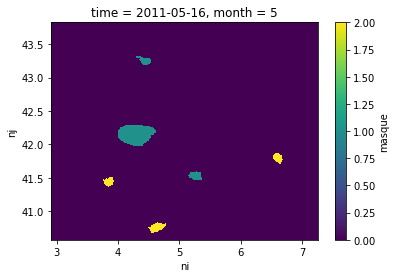

In [12]:
masque_train.isel(time='2019-12-31T18:00:00.000000000').plot()sla_train.isel(time=4000)

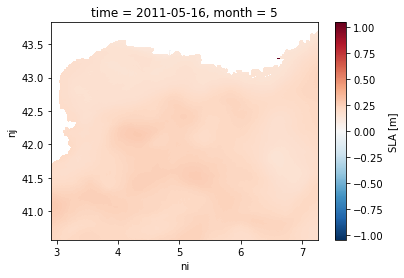

In [27]:
sla_train.isel(time=4000).plot()

In [42]:
sla_train.isel(time=4000)

<xarray.DataArray 'SLA' (time: 29167, nj: 300, ni: 300)>
dask.array<getitem, shape=(29167, 300, 300), dtype=float32, chunksize=(100, 300, 300), chunktype=numpy.ndarray>
Coordinates:
    latitude   (nj, ni) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    longitude  (nj, ni) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
  * ni         (ni) float64 2.909 2.924 2.938 2.953 ... 7.215 7.229 7.244 7.258
  * nj         (nj) float64 40.58 40.59 40.6 40.61 ... 43.79 43.8 43.81 43.82
  * time       (time) datetime64[ns] 2010-01-01 ... 2019-12-31T21:00:00
    month      (time) int64 dask.array<chunksize=(100,), meta=np.ndarray>
Attributes:
    units:    m

In [34]:
sla_train0=sla_train.isel(time=4000) 

In [15]:
path="/home1/scratch/ddasilva/sla-2018-01-07T00.nc"  
XXXX.to_netcdf(path=path)

In [ ]:
unique, counts = np.unique(masque_train, return_counts=True)
print(dict(zip(unique, counts)))

{-9223372036854775806: 2960000, 0: 1139503138, 1: 6040239, 2: 18176623}


(array([2.96000e+06, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.16372e+09]),
 array([-9.22337204e+18, -8.30103483e+18, -7.37869763e+18, -6.45636043e+18,
        -5.53402322e+18, -4.61168602e+18, -3.68934881e+18, -2.76701161e+18,
        -1.84467441e+18, -9.22337204e+17,  2.00000000e+00]),
 <BarContainer object of 10 artists>)

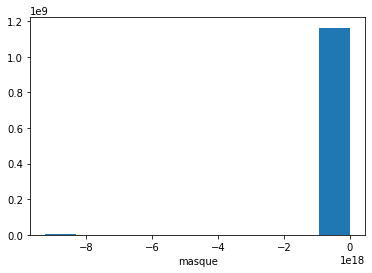

In [ ]:
masque_train.isel().plot()

In [ ]:
#sauvegarder np
XE_train_np = XE_train.to_numpy()
np.save("/home1/scratch/ddasilva/XE_TRAIN_MENOR_2010_2019", arr=XE_train_np)

masque_train_np = masque_train.to_numpy()
np.save("/home1/scratch/ddasilva/MASQUE_TRAIN_MENOR_2010_2019", arr=masque_train_np)

# Fichier test (aprox 15%)

In [ ]:
XE_test= ds.XE.isel(ni=slice(300,500),nj=slice(0,200)).sel(time=(slice('2020','2021')))
masque_test= ds.masque.isel(ni=slice(300,500),nj=slice(0,200)).sel(time=(slice('2020','2021')))

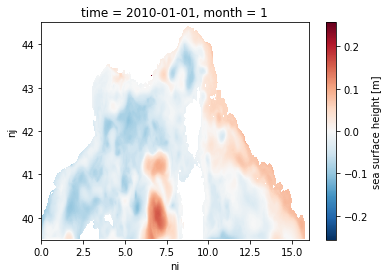

In [10]:
#verify plot of selected area
ds.XE.isel(time=0).plot()

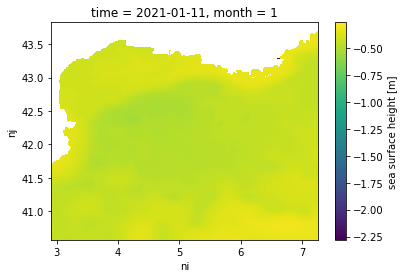

In [ ]:
XE_test.isel(time=500).plot()

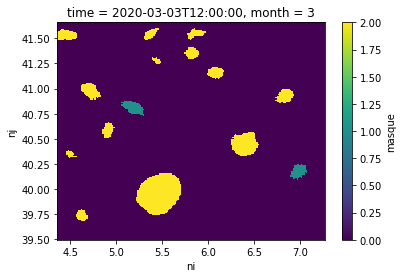

In [29]:
masque_test.isel(time=500).plot()

In [5]:
#sauvegarder np
XE_test_np = XE_test.to_numpy()
np.save("/home1/scratch/ddasilva/XE_TEST_MENOR_2020_2021", arr=XE_test_np)

masque_test_np = masque_test.to_numpy()
np.save("/home1/scratch/ddasilva/MASQUE_TEST_MENOR_2020_2021", arr=masque_test_np)

# Verifier


In [16]:

from py_eddy_tracker import data
from py_eddy_tracker.observations.observation import EddiesObservations
from matplotlib import pyplot as plt
from numpy import arange, cos, linspace, radians, sin
from py_eddy_tracker.eddy_feature import Contours
from py_eddy_tracker.generic import local_to_coordinates

In [17]:
def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(0, 16.0), ax.set_ylim(39.5, 44.5)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))



In [10]:
#open file
ds= xr.open_dataset("/home1/scratch/ddasilva/sla40002.nc",chunks={'time':100})
ds

<xarray.Dataset>
Dimensions:    (nj: 300, ni: 300)
Coordinates:
    latitude   (nj, ni) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    longitude  (nj, ni) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
  * ni         (ni) float64 2.909 2.924 2.938 2.953 ... 7.215 7.229 7.244 7.258
  * nj         (nj) float64 40.58 40.59 40.6 40.61 ... 43.79 43.8 43.81 43.82
    time       datetime64[ns] ...
    month      int64 ...
Data variables:
    SLA        (nj, ni) float32 dask.array<chunksize=(300, 300), meta=np.ndarray>

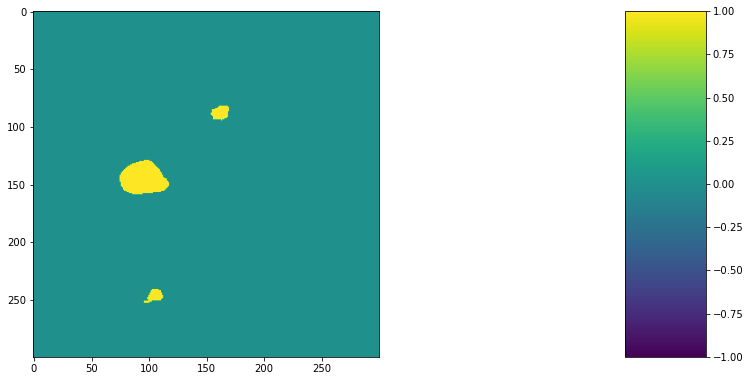

In [24]:
fig = plt.figure(figsize=(15, 6))
plt.imshow(mask_a,  vmin=-1, vmax=1)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()


We assume pixel position of grid is centered for /home1/scratch/ddasilva/sla40002.nc


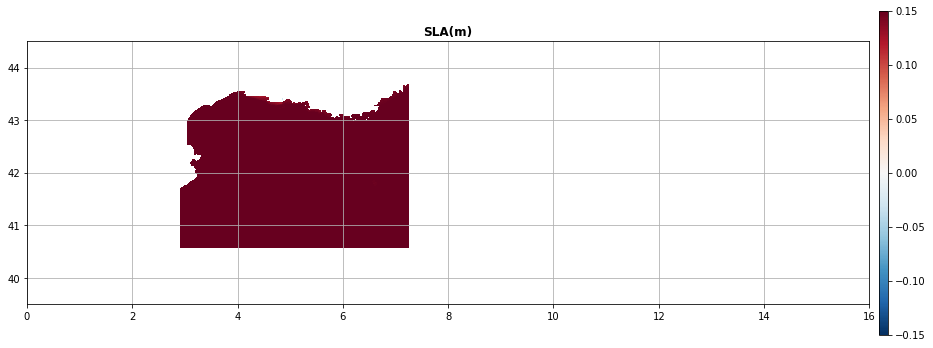

In [39]:
g = RegularGridDataset("/home1/scratch/ddasilva/sla40002.nc",
    "ni",
    "nj",
)

ax = start_axes("SLA(m)")
m = g.display(ax, "SLA", vmin=-0.15, vmax=0.15, cmap="RdBu_r")
update_axes(ax, m)  

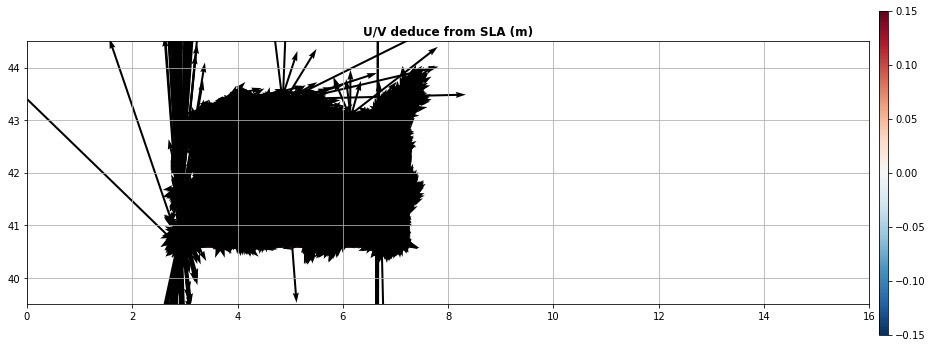

In [40]:
g.add_uv("SLA")
ax = start_axes("U/V deduce from SLA (m)")
ax.set_xlim(0, 16.0), ax.set_ylim(39.5, 44.5)

m = g.display(ax, "SLA", vmin=-0.15, vmax=0.15, cmap="RdBu_r")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=10)
update_axes(ax, m)


In [ ]:
g.bessel_high_filter("SLA", 500)

ax = start_axes("XE (m) filtered (500km)")
m = g.display(ax, "SLA", vmin=-0.15, vmax=0.15, cmap="RdBu_r")
update_axes(ax, m)

In [ ]:
date = datetime(2018, 1, 7,3,0)
a_3, c_3= g.eddy_identification("XE", "u", "v", date, 0.002, shape_error=55)